In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series, read_csv
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
data = datasets.load_breast_cancer()
feature_names = data['feature_names']

In [3]:
len(feature_names), feature_names

(30,
 array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'))

In [4]:
X, y = datasets.load_breast_cancer(return_X_y = True)
type(X),type(y), X.shape, y.shape

(numpy.ndarray, numpy.ndarray, (569, 30), (569,))

In [5]:
# Need to normalize X 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                                                   test_size=0.33, 
                                                                    random_state=42)

In [6]:
X_train.shape, X_test.shape

((381, 30), (188, 30))

In [8]:
lr_model = LogisticRegression(random_state=42, max_iter=10000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.98      0.97      0.97       121

    accuracy                           0.97       188
   macro avg       0.96      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



In [17]:
weights = lr_model.coef_.ravel()
len(weights), weights, weights.shape

(30,
 array([ 1.07741022,  0.29314515, -0.39195936,  0.02492147, -0.13088216,
        -0.20019676, -0.47836915, -0.26666753, -0.22225762, -0.03531741,
        -0.1046084 ,  1.38664397,  0.36586613, -0.14499482, -0.02153619,
         0.01749769, -0.0395005 , -0.03188038, -0.04405482,  0.00219006,
         0.01980305, -0.55294615, -0.09530222, -0.00757251, -0.28332489,
        -0.57106936, -1.16905886, -0.45624789, -0.71246335, -0.08652168]),
 (30,))

<BarContainer object of 30 artists>

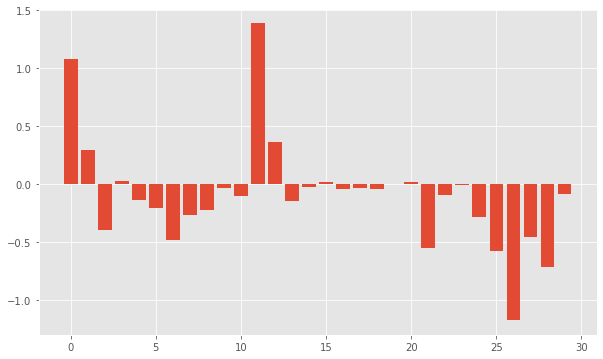

In [18]:
fig, ax = plt.subplots()
ax.bar(np.arange(len(weights)), weights)

<BarContainer object of 30 artists>

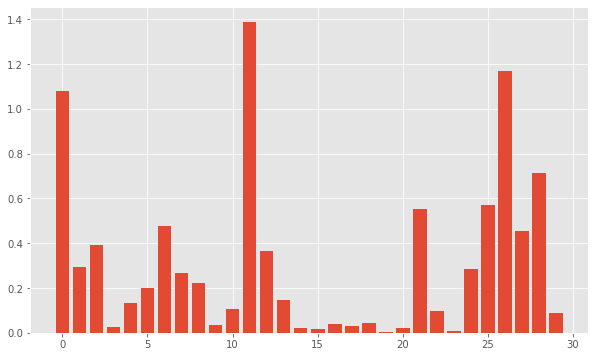

In [20]:
fig, ax = plt.subplots()
ax.bar(np.arange(len(weights)), np.abs(weights))

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


[Text(-5.0, 0, 'mean radius'),
 Text(0.0, 0, 'mean texture'),
 Text(5.0, 0, 'mean perimeter'),
 Text(10.0, 0, 'mean area'),
 Text(15.0, 0, 'mean smoothness'),
 Text(20.0, 0, 'mean compactness'),
 Text(25.0, 0, 'mean concavity'),
 Text(30.0, 0, 'mean concave points'),
 Text(35.0, 0, 'mean symmetry')]

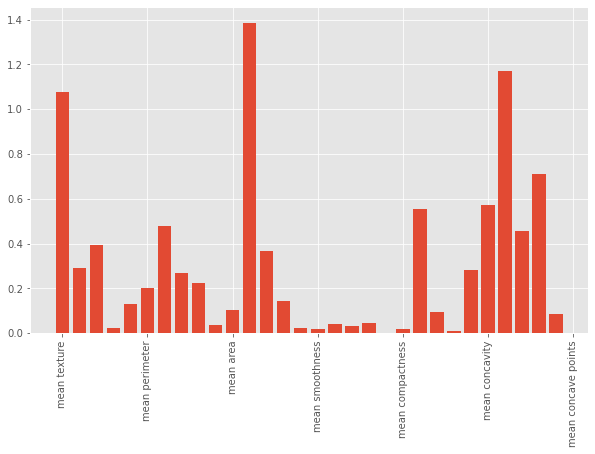

In [22]:
fig, ax = plt.subplots()
ax.bar(np.arange(len(weights)), np.abs(weights))
ax.set_xticklabels(feature_names, rotation=90)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


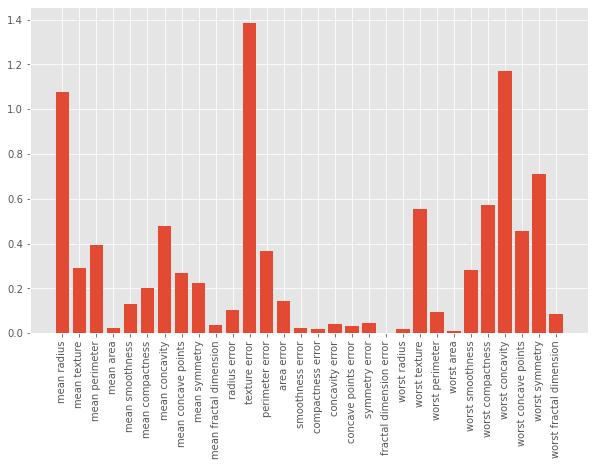

In [24]:
fig, ax = plt.subplots()
ax.bar(np.arange(len(weights)), np.abs(weights))
ax.set_xticklabels(feature_names, rotation=90)
ax.set_xticks(np.arange(len(weights)))